# 🚜 Predicting the Sale Price of Bulldozers using Machine Learning

In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.

## 1. Problem defition

> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data

The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are 3 main datasets:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this project check: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

**Note:** The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

## 4. Features

Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary on Google Sheets: https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing

In [438]:
# All the basic module imports
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import bokeh
plt.show()

## LOAD ENTIRE DATASET

In [439]:
# Read the files with config yaml
def grab_config():
    with open('config.yaml', 'r') as buldozer:
        config = yaml.safe_load(buldozer)
    return config

config = grab_config()

In [440]:
# View train and validation data
tv_df = pd.read_csv(config["train_&_valid"], low_memory=False)
tv_df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## EXPLORATORY DATA ANALYSIS

In [441]:
# Transpose to see the whole column names
tv_df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,11/16/2006 0:00,3/26/2004 0:00,2/26/2004 0:00,5/19/2011 0:00,7/23/2009 0:00


In [442]:
# check data info
tv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [443]:
# Check NaN in train and validation data
tv_df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [444]:
# % of the missing data (NaN)
(tv_df.isna().sum() / len(tv_df) ) * 100

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
saledate                     0.000000
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission

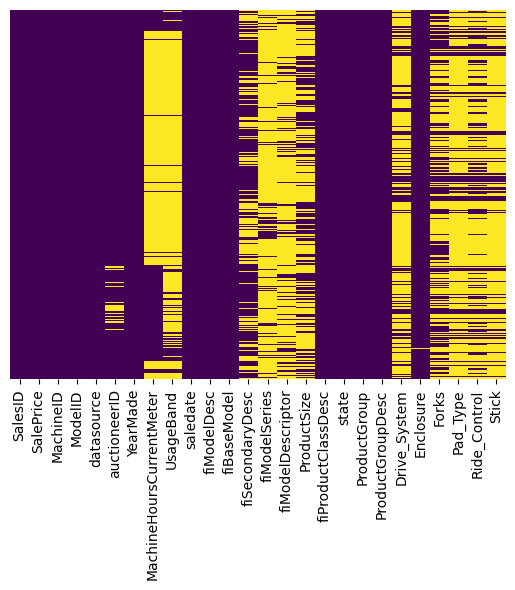

In [445]:
# Yellow represents the missing values  in the corresponding column (first 26)
sns.heatmap(tv_df.iloc[:,:26].isnull(),yticklabels=False,cbar=False,cmap='viridis');

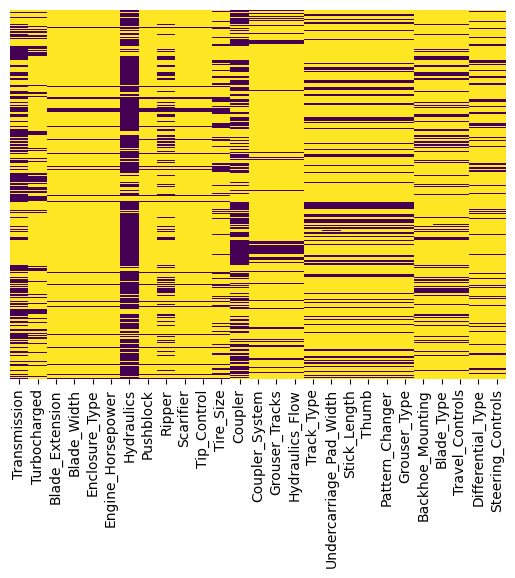

In [446]:
# Yellow represents the missing values in the corresponding column (remaining columns)
sns.heatmap(tv_df.iloc[:,26:].isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [447]:
# Counts the occurrences of each unique ModelID in the tv_df DataFrame and sorts them in descending order
tv_df.ModelID.value_counts()

ModelID
4605     5348
3538     4976
3170     4364
4604     4296
3362     4186
         ... 
20501       1
12333       1
10528       1
12334       1
21446       1
Name: count, Length: 5281, dtype: int64

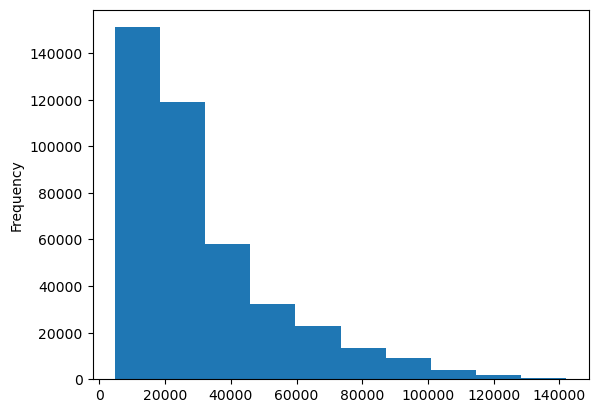

In [448]:
# Sales price distribution
tv_df.SalePrice.plot.hist();

In [449]:
# Counts the occurrences of each unique datasource in the tv_df DataFrame and sorts them in descending order
tv_df.datasource.value_counts()

datasource
132    260776
136     75491
149     33325
121     25191
172     17914
173         1
Name: count, dtype: int64

In [450]:
# Counts the occurrences of each unique state in the tv_df DataFrame and sorts them in descending order
tv_df.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

## LOAD TRAINING DATASET

In [451]:
# Loads the training data from the CSV file specified in config["train_data"] into the tv_df DataFrame.
# The low_memory=False argument is used to ensure the DataFrame is loaded in one go, preventing mixed data types.
# The parse_dates=["saledate"] argument converts the 'saledate' column to datetime format while loading the data.
tv_df = pd.read_csv(config["train_data"], 
                    low_memory=False,
                    parse_dates=["saledate"])

## EXPLORE DATA

In [452]:
tv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   401125 non-null  int64         
 1   SalePrice                 401125 non-null  int64         
 2   MachineID                 401125 non-null  int64         
 3   ModelID                   401125 non-null  int64         
 4   datasource                401125 non-null  int64         
 5   auctioneerID              380989 non-null  float64       
 6   YearMade                  401125 non-null  int64         
 7   MachineHoursCurrentMeter  142765 non-null  float64       
 8   UsageBand                 69639 non-null   object        
 9   saledate                  401125 non-null  datetime64[ns]
 10  fiModelDesc               401125 non-null  object        
 11  fiBaseModel               401125 non-null  object        
 12  fi

In [453]:
# Check data type of the saledate column
tv_df.saledate.dtype

dtype('<M8[ns]')

In [454]:
tv_df.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
401120   2011-11-02
401121   2011-11-02
401122   2011-11-02
401123   2011-10-25
401124   2011-10-25
Name: saledate, Length: 401125, dtype: datetime64[ns]

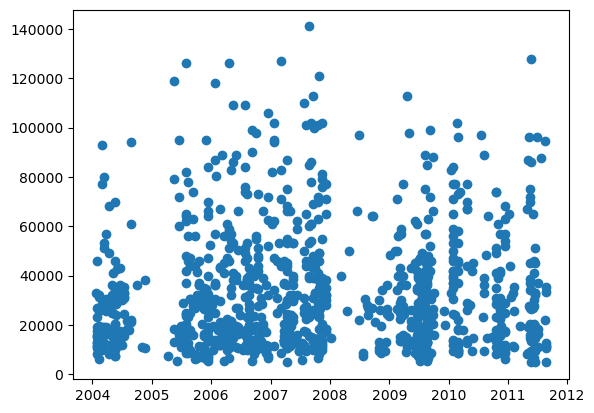

In [455]:
# Scattered plot (for the 1st 1000 saledate data) with Matplotlib
fig, ax = plt.subplots()
ax.scatter(tv_df["saledate"][:1000], tv_df["SalePrice"][:1000]);

## DATA PROCESSING

All the string data type will be converted to categories. [Pandas catgories](https://pandas.pydata.org/docs/reference/api/pandas.api.types.is_string_dtype.html) is used because there are many string columns. And then the df is split into train/validation set before filling the missing values filled. Remember training and test/validation numeric missing values are filled separaely. Also string to categorical conversion is not numeric filling.

In [538]:
def process_data_1(data_df):
    # Sort df according to date
#     data_df.sort_values(by=["saledate"], inplace=True, ascending=True)
    
    # Make a copy of the original df
    tv_df_copy = data_df.copy()
    
    # Enrich the dataset with date_time features. New columns are added
    tv_df_copy["saleYear"] = tv_df_copy.saledate.dt.year
    tv_df_copy["saleMonth"]= tv_df_copy.saledate.dt.month
    tv_df_copy["saleDay"]= tv_df_copy.saledate.dt.day
    tv_df_copy["saleDayOfWeek"]= tv_df_copy.saledate.dt.dayofweek
    tv_df_copy["saleDayofYear"]= tv_df_copy.saledate.dt.dayofyear
    tv_df_copy["saleQuarterofYear"]= tv_df_copy.saledate.dt.quarter
    
    # Then drop the saledate column
    tv_df_copy.drop("saledate", axis=1, inplace=True)
    
    # Filter the DataFrame to include only numeric columns
    numeric_df = tv_df_copy.select_dtypes(include=['number'])
    
    # Convert all string columns to categorical to pandas type
    for label, content in tv_df_copy.items():
        if pd.api.types.is_string_dtype(content):  # fetch string columns
            tv_df_copy[label] = content.astype("category").cat.as_ordered() # convert them to category type. ".cat" ensures category 
            # conversion while ".as_ordered" orders each column in alph order.
            
    # Turn categorical variables into numbers and fill missing
    for label, content in tv_df_copy.items():
        if not pd.api.types.is_numeric_dtype(content):
            # Add binary column to indicate whether sample had missing value
            tv_df_copy[label+"_is_missing"] = pd.isnull(content)
            # Turn categories into numbers and add +1
            tv_df_copy[label] = pd.Categorical(content).codes+1  
    
     # Convert the 'Coupler_System' column to categorical codes
    # This will transform the unique values in the 'Coupler_System' column into integer codes
    pd.Categorical(tv_df_copy["Coupler_System"]).codes
    
    return  data_df, tv_df_copy, numeric_df

In [539]:
tv_df, tv_df_copy, numeric_df = process_data_1(tv_df)

In [540]:
tv_df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [541]:
tv_df_copy.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1139246,66000,999089,3157,121,3.0,2004,68.0,2,950,...,True,True,True,True,True,True,True,True,False,False
1,1139248,57000,117657,77,121,3.0,1996,4640.0,2,1725,...,True,True,True,True,True,True,True,True,False,False
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,1,331,...,True,True,True,True,True,True,True,True,True,True
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,1,3674,...,True,True,True,True,True,True,True,True,True,True
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,3,4208,...,True,True,True,True,True,True,True,True,True,True


In [542]:
tv_df["YearMade"].value_counts()

YearMade
1000    38185
1998    21221
2005    20587
2004    20020
1997    18905
        ...  
1937        1
1949        1
1947        1
2012        1
2013        1
Name: count, Length: 72, dtype: int64

In [543]:
tv_df_copy.saleYear.value_counts()

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [544]:
# Just trying random things here.
# Return the df where saleprice is greater than 125000
tv_df_copy[tv_df_copy["SalePrice"] > 125000]

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
155,1139724,126000,521623,23931,121,3.0,1999,8230.0,1,108,...,True,True,True,True,True,True,True,True,True,True
205,1139916,127000,498384,1638,121,3.0,1998,7190.0,3,2309,...,True,True,True,True,True,False,False,False,True,True
365,1140442,141000,563007,23937,121,3.0,2000,7990.0,3,141,...,True,True,True,True,True,True,True,True,True,True
484,1140848,126000,104209,23926,121,3.0,2002,0.0,0,84,...,True,True,True,True,True,True,True,True,True,True
616,1141278,128000,797180,23926,121,3.0,2004,8930.0,1,84,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395393,6274705,135000,458057,23931,149,1.0,2005,NaN,0,108,...,True,True,True,True,True,True,True,True,True,True
395394,6274714,137000,294464,23931,149,15.0,2006,NaN,0,108,...,True,True,True,True,True,True,True,True,True,True
395395,6274735,141000,68590,23931,149,2.0,2007,NaN,0,108,...,True,True,True,True,True,True,True,True,True,True
395397,6274758,127500,217279,1627,149,1.0,2006,NaN,0,2296,...,True,True,True,True,True,False,False,False,True,True


In [545]:
tv_df_copy.saleYear.nunique()

23

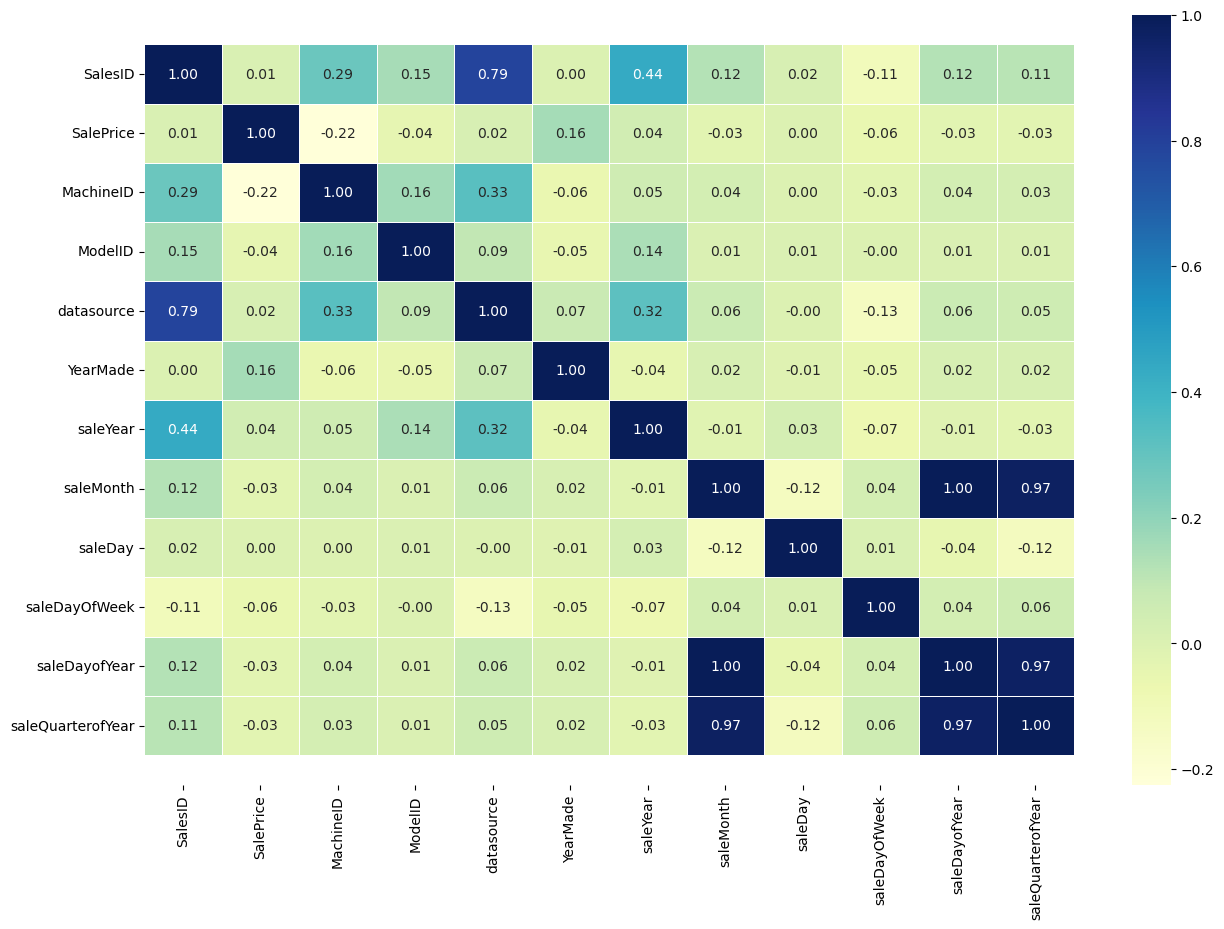

In [546]:
# Drop any columns with NaN values and compute the correlation matrix
corr_matrix = numeric_df.dropna(axis=1).corr()

# Create the heatmap
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

# Adjust the axis to fix potential rendering issues
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

In [547]:
tv_df_copy.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,True,True,True
Blade_Type_is_missing,True,True,True,True,True
Travel_Controls_is_missing,True,True,True,True,True
Differential_Type_is_missing,False,False,True,True,True


In [548]:
# Check if the 'state' column in the DataFrame is of string type
pd.api.types.is_string_dtype(tv_df_copy["state"])

False

In [549]:
# Find the columns in the df which contain strings
for label, content in tv_df_copy.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

In [550]:
# Se what df.items() does, here's an example
# random_dict = {"key1": "hello",
#                "key2": "world!"}

# for key, value in random_dict.items():
#     print(f"this is a key: {key}",
#           f"this is a value: {value}")

In [551]:
tv_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Columns: 102 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(44), float64(2), int16(4), int32(6), int64(6), int8(40)
memory usage: 68.9 MB


In [552]:
# See cat&ordered column
tv_df_copy.state#.cat.categories
#tv_df_copy.UsageBand.cat.categories

0          1
1         33
2         32
3         44
4         32
          ..
401120    20
401121    20
401122    20
401123     9
401124     9
Name: state, Length: 401125, dtype: int8

In [553]:
# State names for example is now coded in numbers even though the df shows strings. The power of PANDA CAT
# tv_df_copy.state.cat.codes

In [554]:
# # Can export current copy dataframe and save it as Train_Val_Cat.csv
# tv_df_copy.to_csv("C:/Users/IHE-Sale/Desktop/Python_projects/Udemy_Project/Data_General/bulldozer_data/Train_Val_Cat.csv",
#               index=False)

# # This helps to start using the csv from here without running all the above cells

In [555]:
# Import it again
# tv_df_copy = pd.read_csv(config[""])

# Add to config list first

In [556]:
# Check all the non_numeric (categorical) columns
# "is.string" can not be used here because is was already converted to "category"
for label, content in tv_df_copy.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

In [557]:
# Extra columns created cos of the "label+"_is_missing""
tv_df_copy.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,True,True,True
Blade_Type_is_missing,True,True,True,True,True
Travel_Controls_is_missing,True,True,True,True,True
Differential_Type_is_missing,False,False,True,True,True


## SPLIT DATA AND HANDLE MISSING VALUES

In [558]:
# Split data into training and validation.
from sklearn.model_selection import train_test_split


X = tv_df_copy.drop("SalePrice", axis=1)
y = tv_df_copy.SalePrice

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=42)

In [559]:
len(X_train), len(X_val)

(320900, 80225)

In [560]:
# Check all the numeric columns
for label, content in tv_df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayofYear
saleQuarterofYear
UsageBand_is_missing
fiModelDesc_is_missing
fiBaseModel_is_missing
fiSecondaryDesc_is_missing
fiModelSeries_is_missing
fiModelDescriptor_is_missing
ProductSize_is_missing
fiProductClassDesc_is_missing
state_is_missing
ProductGroup_is_missing
ProductGroupDesc_is_m

In [561]:
def find_null_numeric_columns(df):
    """
    Prints the names of numeric columns in the DataFrame that contain null values.

    Parameters:
    df (pd.DataFrame): The DataFrame to check.

    Returns:
    None
    """
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum():
            print(label)

In [562]:
find_null_numeric_columns(X_train)

auctioneerID
MachineHoursCurrentMeter


In [563]:
def handle_missing_numeric_data(df):
    """
    For each numeric column in the DataFrame that contains null values,
    adds a binary column indicating missing data, and fills missing values with the median.

    Parameters:
    df (pd.DataFrame): The DataFrame to process.

    Returns:
    pd.DataFrame: The modified DataFrame with added binary columns and filled missing values.
    """
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column indicating missing data
                df[label + "_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with the median
                df[label] = content.fillna(content.median())

    return df

In [564]:
X_train = handle_missing_numeric_data(X_train)

In [565]:
# View to see the added "_is_missing" (bool) columns
X_train.head().T

,174860,47585,281501,188048,117994
SalesID,1604783,1289910,1883474,1624011,1456710
MachineID,1217459,1347703,1263460,1176538,1353316
ModelID,4699,3172,10907,1918,4147
datasource,132,132,132,132,132
auctioneerID,13.0,2.0,2.0,1.0,6.0
...,...,...,...,...,...
Travel_Controls_is_missing,True,True,True,False,False
Differential_Type_is_missing,False,True,True,True,True
Steering_Controls_is_missing,False,True,True,True,True
auctioneerID_is_missing,False,False,False,False,False


In [566]:
# Fill X_val numeric columns with the median by calling the function
X_val = handle_missing_numeric_data(X_val)

In [567]:
X_val.head().T

,347851,361528,296035,165866,303180
SalesID,2404577,2501703,2227746,1590101,2248487
MachineID,1123369,1448367,1062020,1116102,1224931
ModelID,9133,22353,4035,8165,4149
datasource,136,149,136,132,136
auctioneerID,7.0,1.0,3.0,6.0,1.0
...,...,...,...,...,...
Travel_Controls_is_missing,True,False,False,True,False
Differential_Type_is_missing,True,True,True,True,True
Steering_Controls_is_missing,True,True,True,True,True
auctioneerID_is_missing,False,False,False,False,False


In [568]:
# Demonstrate how median is more robust than mean
# hundreds = np.full((1000,), 100)
# hundreds_billion = np.append(hundreds, 1000000000) # Just attatch number 1, 000, 000, 000
# np.mean(hundreds), np.mean(hundreds_billion), np.median(hundreds), np.median(hundreds_billion)

In [569]:
# hundreds

In [570]:
# hundreds_billion

In [571]:
# Now check if there's any null X_train numeric values
find_null_numeric_columns(X_train)
            
# No result returned showing no NaN for the numerical columns

In [572]:
# Now check if there's any null X_val numeric values
find_null_numeric_columns(X_val)
            
# No result returned showing no NaN for the numerical columns

In [573]:
# Double check
X_train.isna().sum().sum()

0

In [574]:
# Double check
X_val.isna().sum().sum()

0

In [575]:
# Check to see how many examples were missing
X_train.auctioneerID_is_missing.value_counts()

# Remember "_is_missing" above

auctioneerID_is_missing
False    304844
True      16056
Name: count, dtype: int64

Now that all of train/val data is numeric as well as our dataframe has no missing values, we should be able to build a machine learning model.

In [576]:
# import panel as pn
# pn.extension()

In [577]:
# import pandas as pd
# import panel as pn

# #tv_df_copy = pd.read_csv('tv_dataset.csv')

# def histogram(Year):
#     tv_df_copy[tv_df_copy.Year == Year].SalePrice.plot.hist()

# years = list(tv_df_copy.Year.unique())
# histogram_plot = pn.interact(histogram, Year=years)

# widget_panel = pn.Column(histogram_plot)

# dashboard = pn.Column(widget_panel)

# dashboard.servable()


## MODEL AND EVALUATION

Remember the goal for this project will be to build a machine learning model which minimises RMSLE.

Machine learning model map [here](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

In [578]:
# Using the whole dataset takes far too long... for experimenting

# %%time
# model = RandomForestRegressor(n_jobs=-1, 
#                               random_state=42)

# model.fit(X_train, y_train)

In [579]:
# # Change max_samples value for RandomForestRegressor for example will model a subset (10,000 in this case)
# # Don't forget I am trying out 3 models here. This will gulp a lot of time cos the dataset is large.
# model = RandomForestRegressor(n_jobs=-1,
#                               random_state=42,
#                               max_samples=10000)

In [498]:
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)

In [499]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Caculates root mean squared log error between predictions and
    true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_val, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_val, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_val, val_preds)}
    return scores

In [500]:
%%time

model = RandomForestRegressor(n_jobs=-1, 
                              random_state=42,
                              max_samples=10000) # max_samples=10000 can be used to cut down on the number of samples to 
                                                 # shorten/improve training time. max_samples=None is default and
                                                 # represents the whole dataset
                             
 
model.fit(X_train, y_train);

CPU times: total: 1min 2s
Wall time: 16.9 s


In [501]:
show_scores(model)

# Valid RMSLE is the target

{'Training MAE': 5532.117208258024,
 'Valid MAE': 5692.833239264569,
 'Training RMSLE': 0.25601860723284875,
 'Valid RMSLE': 0.26408969001501725,
 'Training R^2': 0.8624647197109812,
 'Valid R^2': 0.8514290605687972}

In [502]:
# # This model raised error: ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.
# %%time
# model = SGDRegressor()
 
#  model.fit(X_train, y_train);

In [503]:
# show_scores(model)

In [504]:
# # This model raised error: ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.
# %%time
# model = clf
 
# model.fit(X_train, y_train);

In [505]:
# show_scores(model)

## Hyerparameter Tuning With RandomizedSearchCV

In [506]:
# View hyperparameters
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': 10000,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [507]:
%%time
from sklearn.model_selection import RandomizedSearchCV


# Different RandomForestRegressor hyperparameters
# Can also add "max_samples": [10000] to rf_grid to model on the subset of the data thereby rducing run time
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"]
}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2, # This can be increase for better result options. n_iter=100 for e.g takes to 2hrs 
                              #to run, so..
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train);

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 17min 26s
Wall time: 4min 41s


In [508]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_features': 1,
 'max_depth': None}

In [509]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 5301.692407955733,
 'Valid MAE': 6681.717608853569,
 'Training RMSLE': 0.24708321444497802,
 'Valid RMSLE': 0.30583550963066036,
 'Training R^2': 0.8787859006208548,
 'Valid R^2': 0.8027375122121079}

In [510]:
# Compare above with below to see if any improvent in Valid_RMSLE
show_scores(model)

{'Training MAE': 5532.117208258024,
 'Valid MAE': 5692.833239264569,
 'Training RMSLE': 0.25601860723284875,
 'Valid RMSLE': 0.26408969001501725,
 'Training R^2': 0.8624647197109812,
 'Valid R^2': 0.8514290605687972}

Yes, the value of Valid_RMSLE reduced which is desirable

## Make Predictions On Test Data

In [596]:
np.random.seed(42)
# Import the test data
df_test = pd.read_csv(config["test_data"],
                      low_memory=False,
                      parse_dates=["saledate"])

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [597]:
df_test.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'saledate',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls'],
      dtype='object')

## Preprocessing The Test Data: getting the test dataset in the same format as the training dataset.

In [598]:
def process_data_2(df):
    # Enrich the dataset with date_time features. New columns are added
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayofYear"] = df.saledate.dt.dayofyear
    df["saleQuarterofYear"] = df.saledate.dt.quarter
    
    # Then drop the saledate column
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):  # Handle numeric columns
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
                
        # Fill categorical missing data and turn categories into numbers
        elif not pd.api.types.is_numeric_dtype(content):  # Handle categorical columns
            df[label+"_is_missing"] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes + 1  
    
    return df

In [599]:
df_test = process_data_2(df_test)

In [600]:
# Make predictions on updated test data
#test_preds = model.predict(df_test)

In [601]:
# We can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [602]:
df_test.auctioneerID.isna().sum()

0

In [603]:
tv_df_copy.auctioneerID.isna().sum()

20136

So, the {'auctioneerID_is_missing'} difference is because tv_df_copy originally has some NaN in auctioneerID column while  auctioneerID column of df_test does not have NaN 

In [608]:
# Manually adjust df_test to have auctioneerID_is_missing and MachineHoursCurrentMeter_is_missing columns
df_test["auctioneerID_is_missing"] = False

# Reorder the columns of df_test to match the order of df_train
df_test = df_test[X_train.columns]

# Now, df_test should have columns in the same order as df_train

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,False,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,False,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,True,True,True,True,True,False,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,True,True,True,True,True,False,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,False,False,False,True,True,False,False


Finally now our test dataframe has the same features as our training dataframe, we can make predictions!

In [609]:
set(X_train.columns) - set(df_test.columns)

set()

In [610]:
test_preds = model.predict(df_test)

In [611]:
# To solve the above issue, get the list of feature names that were used to train the model
# feature_names = list(X_train.columns)  

# Make predictions on the test dataset using the list of feature names
test_preds = rs_model.predict(df_test)


In [612]:
test_preds

array([18972.25696337, 25617.65632125, 45876.12262928, ...,
       23937.58173504, 26423.70281507, 30504.26747096])

We've made some predictions but they're not in the same format Kaggle is asking for: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

In [613]:
# Format predictions to a dataframe
df_preds = pd.DataFrame() # Empty df
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,18972.256963
1,1227844,25617.656321
2,1227847,45876.122629
3,1227848,42623.935930
4,1227863,37967.379674
...,...,...
12452,6643171,24210.092885
12453,6643173,25530.334127
12454,6643184,23937.581735
12455,6643186,26423.702815


In [ ]:
# Export prediction data
# df_preds.to_csv("C:/Users/IHE-Sale/Desktop/Python_projects/Udemy_Project/Data_General/bulldozer_data/My_Test_predictions.csv", index=False)

## FEATURE IMPORTANCE

Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the **target variable** (SalePrice).

In [615]:
# rs_model.best_estimator_.feature_importances_

In [616]:
# Helper function for plotting feature importance
# n=20 and [:20] uses the the first 20 features of the X_train df
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

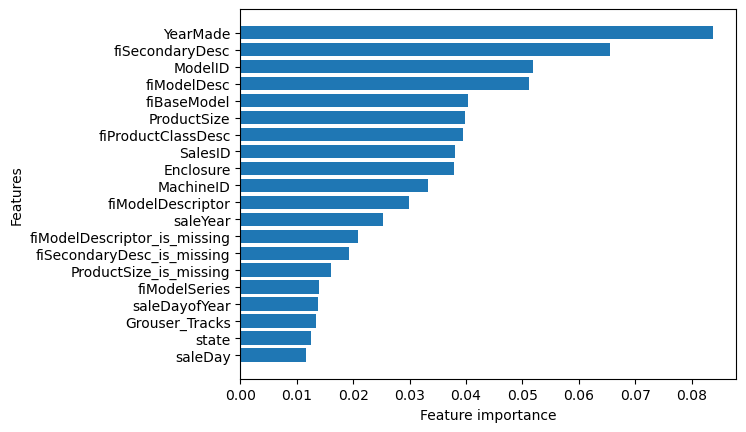

In [617]:
plot_features(X_train.columns, rs_model.best_estimator_.feature_importances_)